# Similarity and Distance Measures

## Introduction:
- **Pattern Mining**: 
  - Aim: Identify frequent patterns within datasets.
  - Importance: Understanding the similarity or difference between data points helps in extracting meaningful, recurring patterns.

- **Clustering**:
  - Aim: Group similar data points together.
  - Key Concept: Similarity or distance is fundamental to determine which data points belong to the same cluster.
  - Example: In k-means clustering, the distance measure helps assign data points to the nearest centroid.

- **Outlier Detection**:
  - Aim: Identify anomalies or rare items in data.
  - Method: Measure how different a data point is from the rest using distance measures to determine if it's an outlier.
  - Note: Outliers often have significantly higher or lower distance values compared to other data points.

## Similarity, Dissimilarity, and Proximity

#### Key Concepts:
- **Similarity Measure**:
  - A function quantifying the similarity between two objects.
  - Higher values indicate more similarity.
  - Typically ranges from 0 (no similarity) to 1 (completely similar).

- **Dissimilarity (or Distance) Measure**:
  - Numerically expresses how different two data objects are.
  - Inverse of similarity: lower values mean more alike.
  - Minimum dissimilarity often 0 (completely similar).
  - Range varies (e.g., [0, 1] or [0, ∞)).

- **Proximity**:
  - Refers to either similarity or dissimilarity.

### Data Matrix

#### Key Concepts:
- **Data Matrix**:
  - A matrix representing data points and their attributes.
  - Each row corresponds to a data point.
  - Each column represents an attribute.
  - Dimensions: `n` data points × `l` attributes.

#### Example:
Consider a data matrix with `n` data points and `l` attributes. We can represent it using a NumPy array in Python.

In [2]:
import pandas as pd
import random

# Set the seed for reproducibility
random.seed(0)

# Define the number of entries
num_entries = 10

# Generate data
data = {
    "Bedroom Count": [random.randint(1, 5) for _ in range(num_entries)],
    "Square Footage": [random.randint(800, 3500) for _ in range(num_entries)],
    "House Colour": [random.choice(['Red', 'Blue', 'Yellow']) for _ in range(num_entries)],
    "Has Garage": [random.choice([True, False]) for _ in range(num_entries)],
    "Has Shed": [random.choice([True, False]) for _ in range(num_entries)],
    "Condition": [random.choice(['Fair', 'Good', 'Very Good', 'Excellent']) for _ in range(num_entries)]  
}

# Create DataFrame
real_estate_original_data = pd.DataFrame(data)

real_estate_data = real_estate_original_data.copy()
real_estate_data

,Bedroom Count,Square Footage,House Colour,Has Garage,Has Shed,Condition
0,4,3189,Yellow,True,True,Good
1,4,1694,Yellow,False,False,Good
2,1,2867,Red,False,True,Excellent
3,3,1370,Blue,False,False,Fair
4,5,1954,Red,True,False,Fair
5,4,1372,Yellow,False,True,Very Good
6,4,1188,Red,False,False,Excellent
7,3,3332,Yellow,False,True,Fair
8,4,1826,Blue,True,True,Very Good
9,3,2981,Blue,True,True,Very Good


### Dissimilarity or Distance Matrix

#### Key Concepts:
- **Dissimilarity Matrix**:
  - A matrix representing distances between pairs of data points.
  - Entry `d(i, j)` indicates the distance between data points `i` and `j`.
  - Typically, a symmetric matrix where `d(i, j) = d(j, i)` and `d(i, i) = 0`.

## Comparing objects based on numeric features: Bedroom Count and Square Footage

### Use z-score to standardize numeric columns

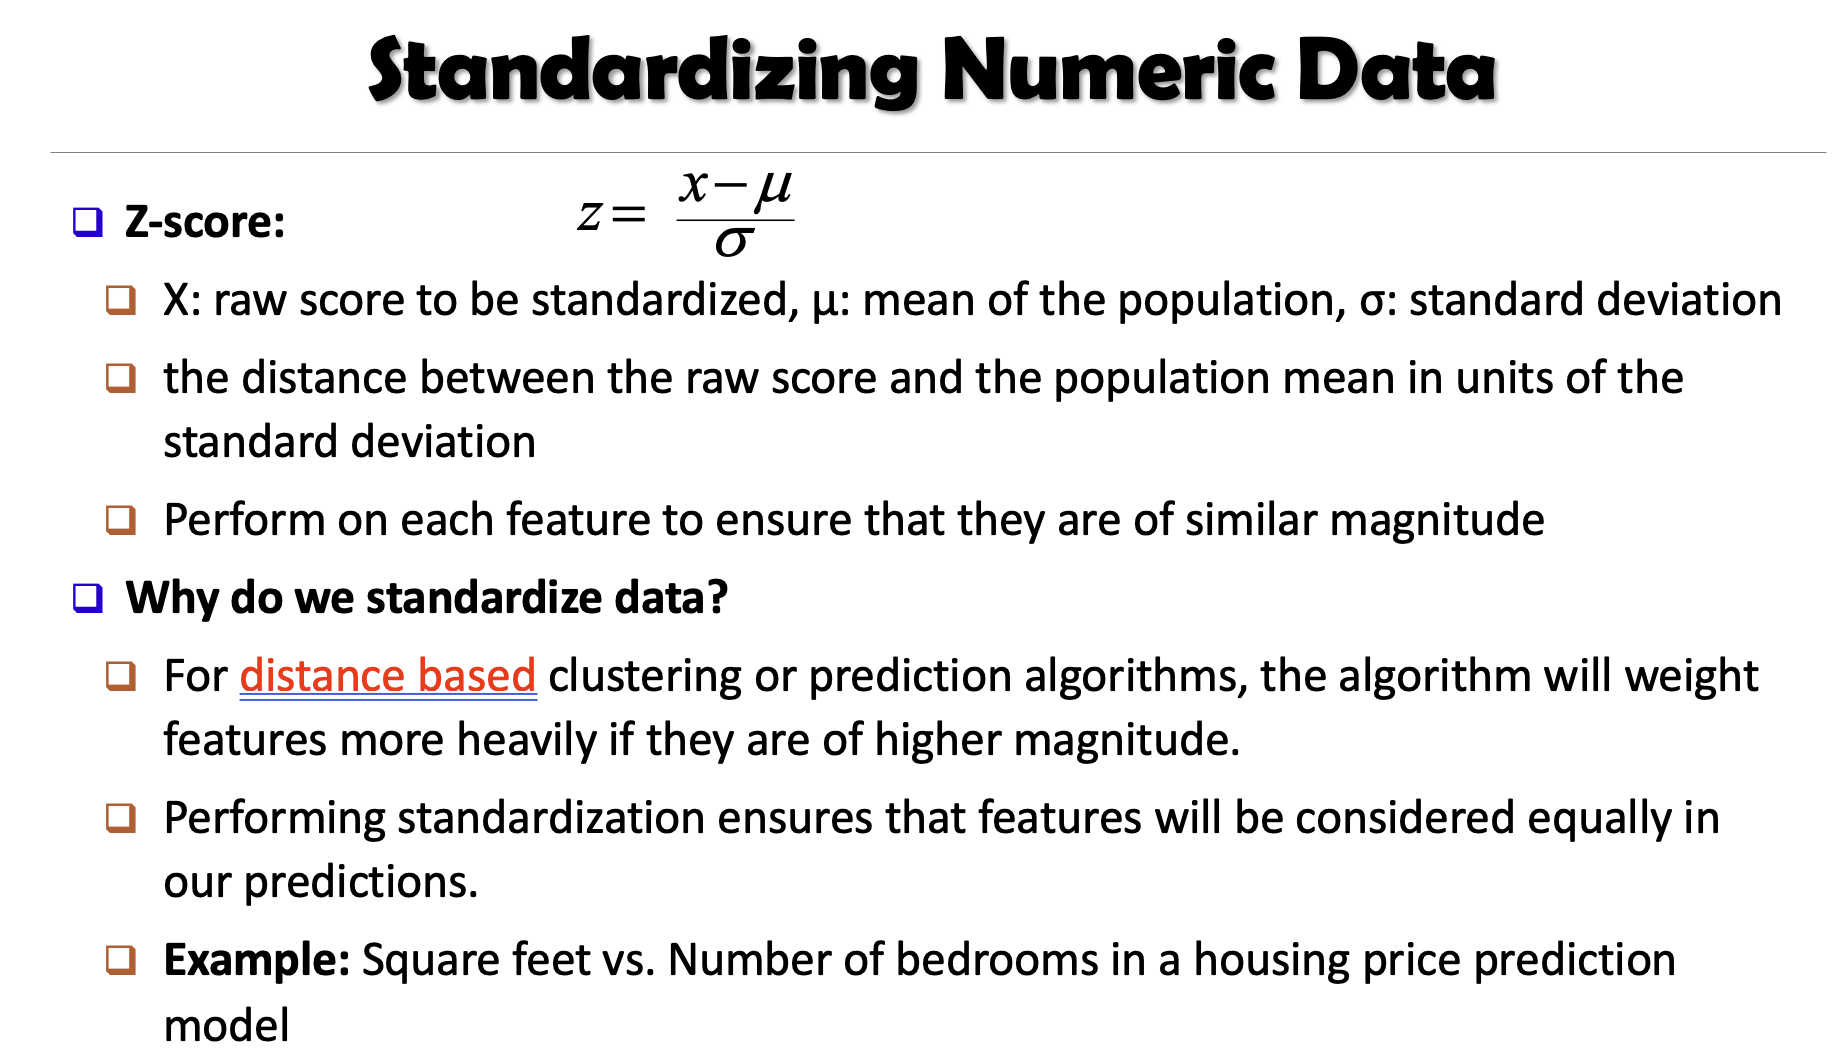

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
real_estate_data[["Bedroom Count","Square Footage"]] = scaler.fit_transform(real_estate_data[["Bedroom Count","Square Footage"]])

In [3]:
real_estate_data

,Bedroom Count,Square Footage,House Colour,Has Garage,Has Shed,Condition
0,0.48795,1.288576,Yellow,True,True,Good
1,0.48795,-0.615567,Yellow,False,False,Good
2,-2.43975,0.878453,Red,False,True,Excellent
3,-0.48795,-1.028237,Blue,False,False,Fair
4,1.46385,-0.284411,Red,True,False,Fair
5,0.48795,-1.025689,Yellow,False,True,Very Good
6,0.48795,-1.260045,Red,False,False,Excellent
7,-0.48795,1.470711,Yellow,False,True,Fair
8,0.48795,-0.447442,Blue,True,True,Very Good
9,-0.48795,1.023652,Blue,True,True,Very Good


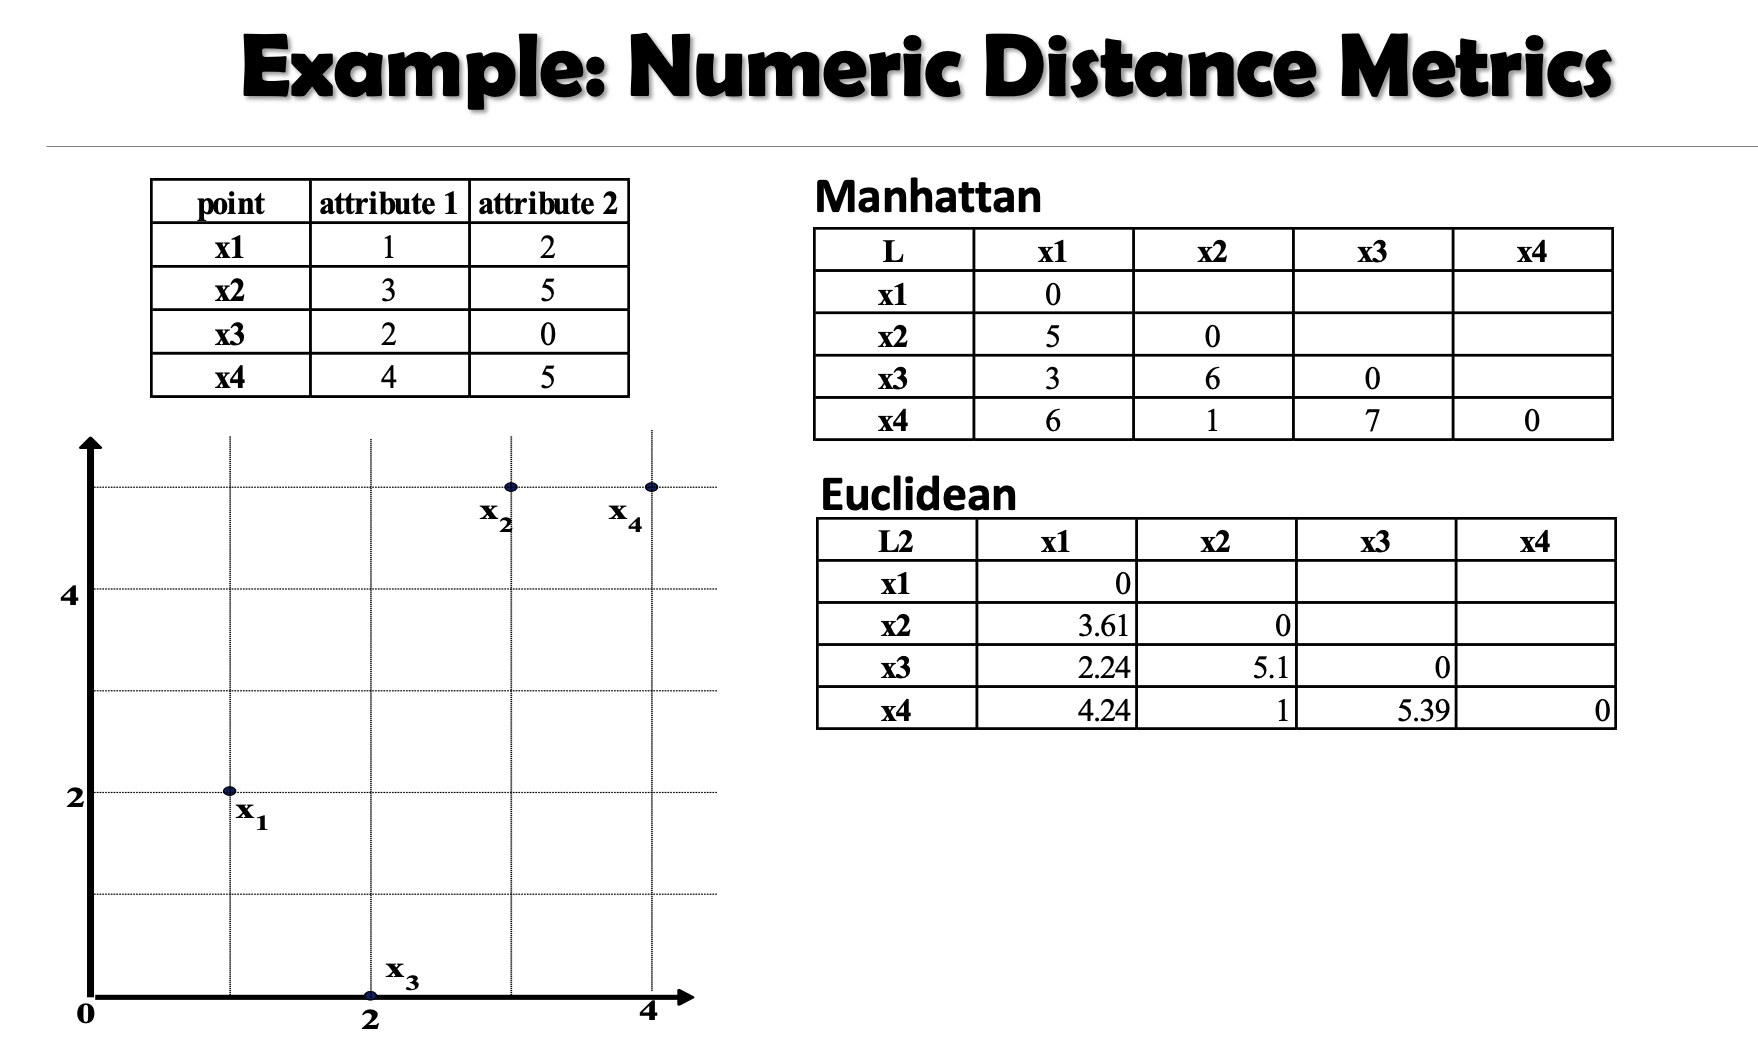

### Create a Euclidean distance matrix and a Heatmap

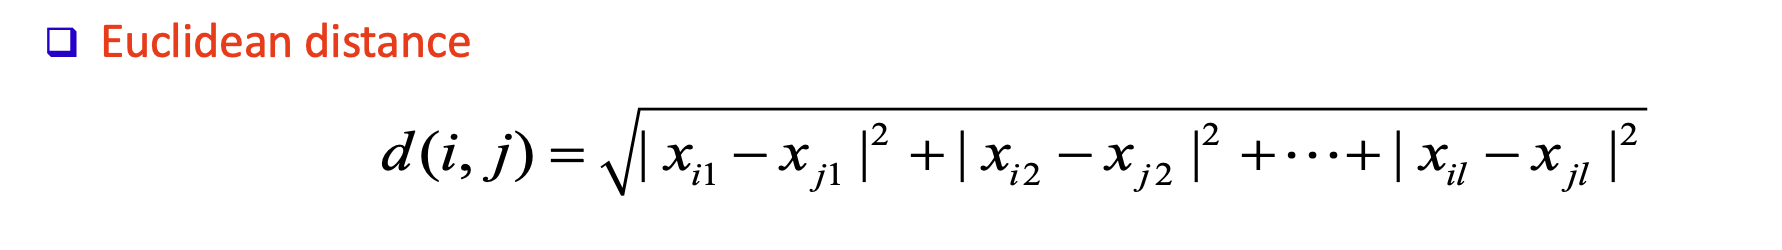



In [4]:
from scipy.spatial import distance_matrix

dist_matrix = distance_matrix(real_estate_data[["Bedroom Count","Square Footage"]], real_estate_data[["Bedroom Count","Square Footage"]])
dist_matrix_df = pd.DataFrame(dist_matrix)
dist_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,0.000000,1.904142,2.956286,2.513961,1.851126,2.314265,2.548621,0.992751,1.736017,1.011220
1,1.904142,0.000000,3.286871,1.059565,1.030556,0.410123,0.644479,2.303244,0.168125,1.907726
2,2.956286,3.286871,0.000000,2.728551,4.073125,3.492447,3.625549,2.039680,3.213942,1.957194
3,2.513961,1.059565,2.728551,0.000000,2.088732,0.975903,1.003053,2.498948,1.135651,2.051888
4,1.851126,1.030556,4.073125,2.088732,0.000000,1.225510,1.379943,2.624877,0.989424,2.349586
5,2.314265,0.410123,3.492447,0.975903,1.225510,0.000000,0.234356,2.680372,0.578248,2.269841
6,2.548621,0.644479,3.625549,1.003053,1.379943,0.234356,0.000000,2.899899,0.812604,2.483476
7,0.992751,2.303244,2.039680,2.498948,2.624877,2.680372,2.899899,0.000000,2.152136,0.447059
8,1.736017,0.168125,3.213942,1.135651,0.989424,0.578248,0.812604,2.152136,0.000000,1.765360
9,1.011220,1.907726,1.957194,2.051888,2.349586,2.269841,2.483476,0.447059,1.765360,0.000000


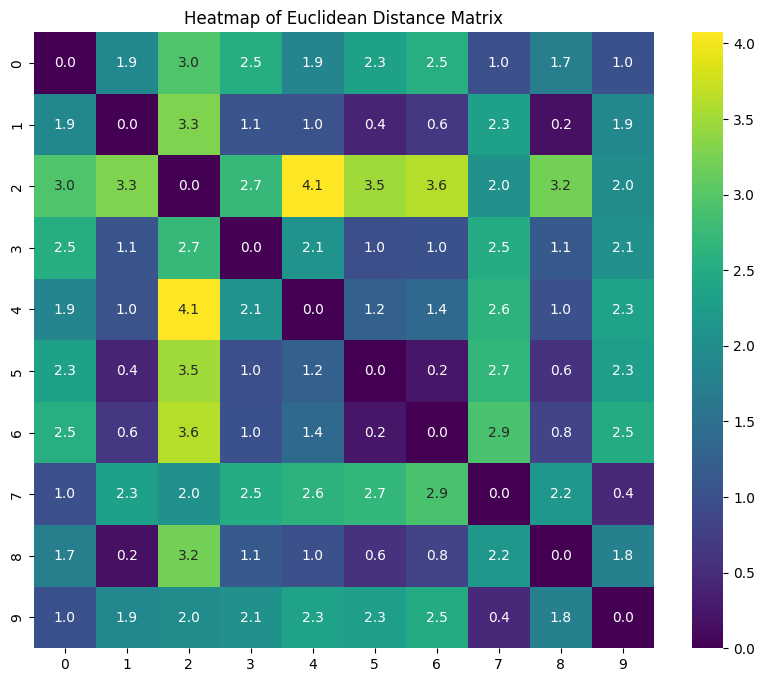

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the heatmap of the distance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(dist_matrix_df, cmap='viridis',annot=True, fmt='.1f')
plt.title("Heatmap of Euclidean Distance Matrix")
plt.show()



In [6]:
real_estate_original_data

,Bedroom Count,Square Footage,House Colour,Has Garage,Has Shed,Condition
0,4,3189,Yellow,True,True,Good
1,4,1694,Yellow,False,False,Good
2,1,2867,Red,False,True,Excellent
3,3,1370,Blue,False,False,Fair
4,5,1954,Red,True,False,Fair
5,4,1372,Yellow,False,True,Very Good
6,4,1188,Red,False,False,Excellent
7,3,3332,Yellow,False,True,Fair
8,4,1826,Blue,True,True,Very Good
9,3,2981,Blue,True,True,Very Good


**as you can see, the points that are darker like 1 and 8 are similar houses whereas houses 2 and 4 are quite different**

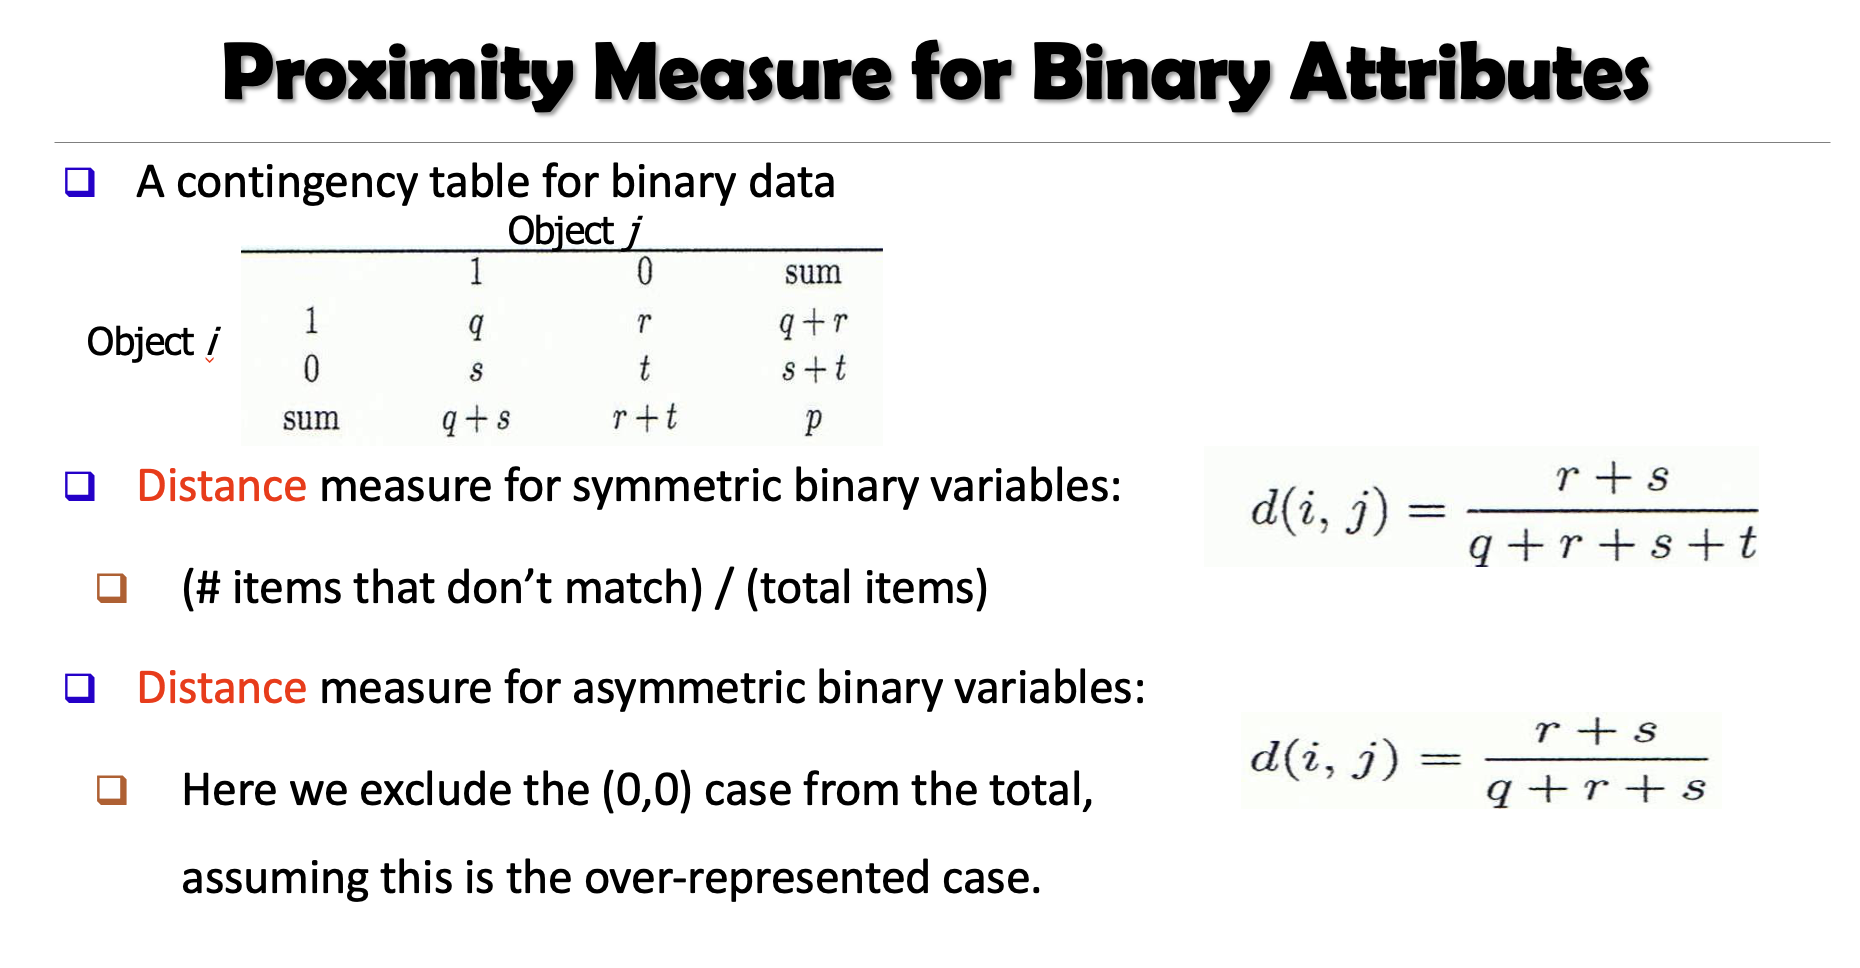

## Proximity Measure for Binary Attributes

There are two binary attributes: has_garage and has_shed


In [7]:
import pandas as pd
import numpy as np

# Create a DataFrame
binary_df = real_estate_data[["Has Garage", "Has Shed"]]

# Function to calculate the distance for binary attributes using the formula from the slide
def binary_distance(x, y):
    # Contingency table values
    q = np.sum(np.logical_and(x == 1, y == 1))
    r = np.sum(np.logical_and(x == 1, y == 0))
    s = np.sum(np.logical_and(x == 0, y == 1))
    t = np.sum(np.logical_and(x == 0, y == 0))
    
    # Distance calculation
    return (r + s) / (q + r + s + t)

# Initialize the distance matrix
distance_matrix_binary = np.zeros((len(binary_df), len(binary_df)))

# Calculate the distance matrix for binary attributes
for i in range(len(binary_df)):
    for j in range(len(binary_df)):
        distance_matrix_binary[i, j] = binary_distance(binary_df.iloc[i], binary_df.iloc[j])

# Convert to DataFrame for better visualization
distance_matrix_binary_df = pd.DataFrame(distance_matrix_binary)
distance_matrix_binary_df


,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.5,1.0,0.5,0.5,1.0,0.5,0.0,0.0
1,1.0,0.0,0.5,0.0,0.5,0.5,0.0,0.5,1.0,1.0
2,0.5,0.5,0.0,0.5,1.0,0.0,0.5,0.0,0.5,0.5
3,1.0,0.0,0.5,0.0,0.5,0.5,0.0,0.5,1.0,1.0
4,0.5,0.5,1.0,0.5,0.0,1.0,0.5,1.0,0.5,0.5
5,0.5,0.5,0.0,0.5,1.0,0.0,0.5,0.0,0.5,0.5
6,1.0,0.0,0.5,0.0,0.5,0.5,0.0,0.5,1.0,1.0
7,0.5,0.5,0.0,0.5,1.0,0.0,0.5,0.0,0.5,0.5
8,0.0,1.0,0.5,1.0,0.5,0.5,1.0,0.5,0.0,0.0
9,0.0,1.0,0.5,1.0,0.5,0.5,1.0,0.5,0.0,0.0


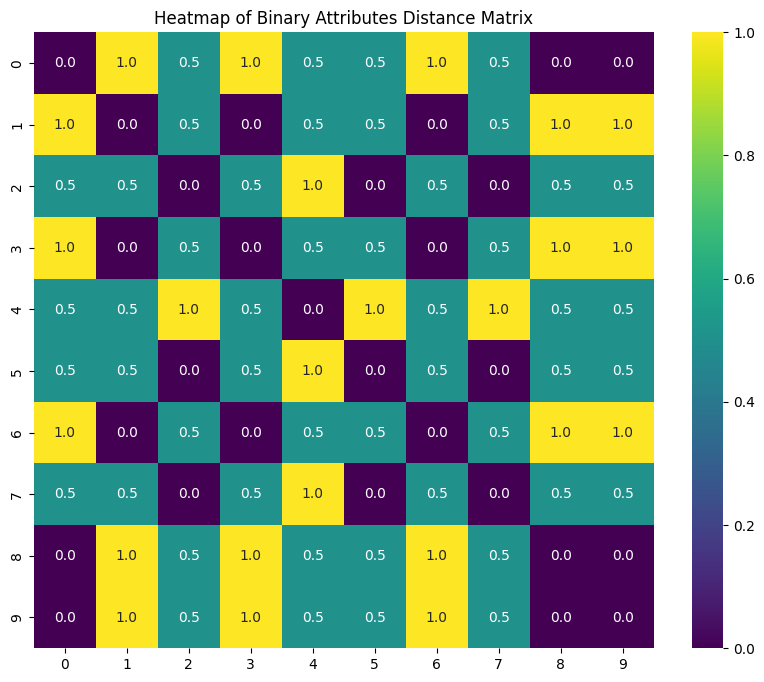

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the heatmap of the distance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix_binary_df, cmap='viridis', annot=True, fmt='.1f')
plt.title("Heatmap of Binary Attributes Distance Matrix")
plt.show()


In [8]:
real_estate_data

,Bedroom Count,Square Footage,House Colour,Has Garage,Has Shed,Condition
0,0.48795,1.288576,Yellow,True,True,Good
1,0.48795,-0.615567,Yellow,False,False,Good
2,-2.43975,0.878453,Red,False,True,Excellent
3,-0.48795,-1.028237,Blue,False,False,Fair
4,1.46385,-0.284411,Red,True,False,Fair
5,0.48795,-1.025689,Yellow,False,True,Very Good
6,0.48795,-1.260045,Red,False,False,Excellent
7,-0.48795,1.470711,Yellow,False,True,Fair
8,0.48795,-0.447442,Blue,True,True,Very Good
9,-0.48795,1.023652,Blue,True,True,Very Good


In [9]:
# Function to calculate the nominal distance (0 for same category, 1 for different)
def nominal_distance(x, y):
    return 0 if x == y else 1

# Initialize the distance matrix for the 'House Colour' attribute
distance_matrix_nominal = np.zeros((len(real_estate_data['House Colour']), 
                                    len(real_estate_data['House Colour'])))

# Calculate the distance matrix for the 'House Colour' attribute
for i in range(len(real_estate_data['House Colour'])):
    for j in range(len(real_estate_data['House Colour'])):
        distance_matrix_nominal[i, j] = nominal_distance(real_estate_data['House Colour'][i], 
                                                         real_estate_data['House Colour'][j])

# Convert to DataFrame for better visualization
distance_matrix_nominal_df = pd.DataFrame(distance_matrix_nominal)
distance_matrix_nominal_df


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
5,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
6,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
7,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
8,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
9,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


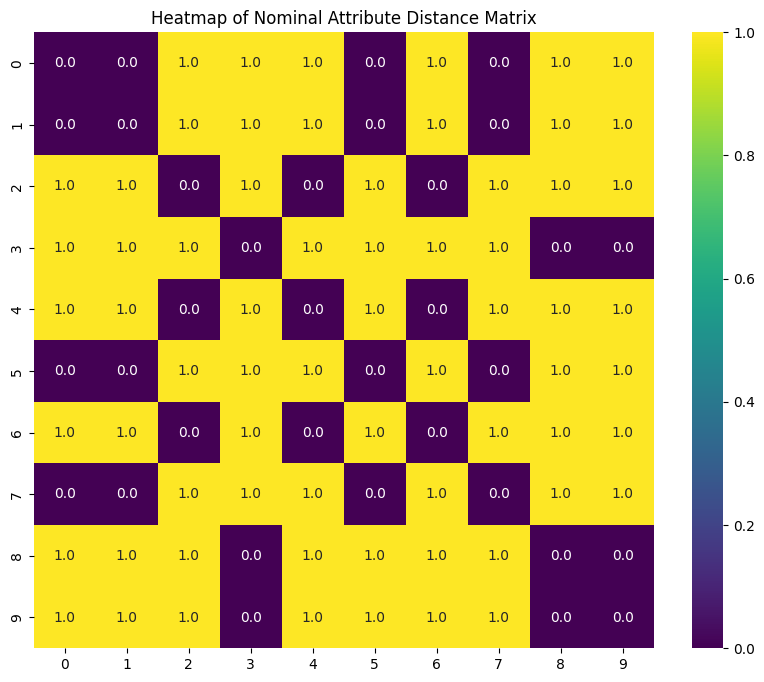

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the heatmap of the distance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix_nominal_df, cmap='viridis', annot=True, fmt='.1f')
plt.title("Heatmap of Nominal Attribute Distance Matrix")
plt.show()


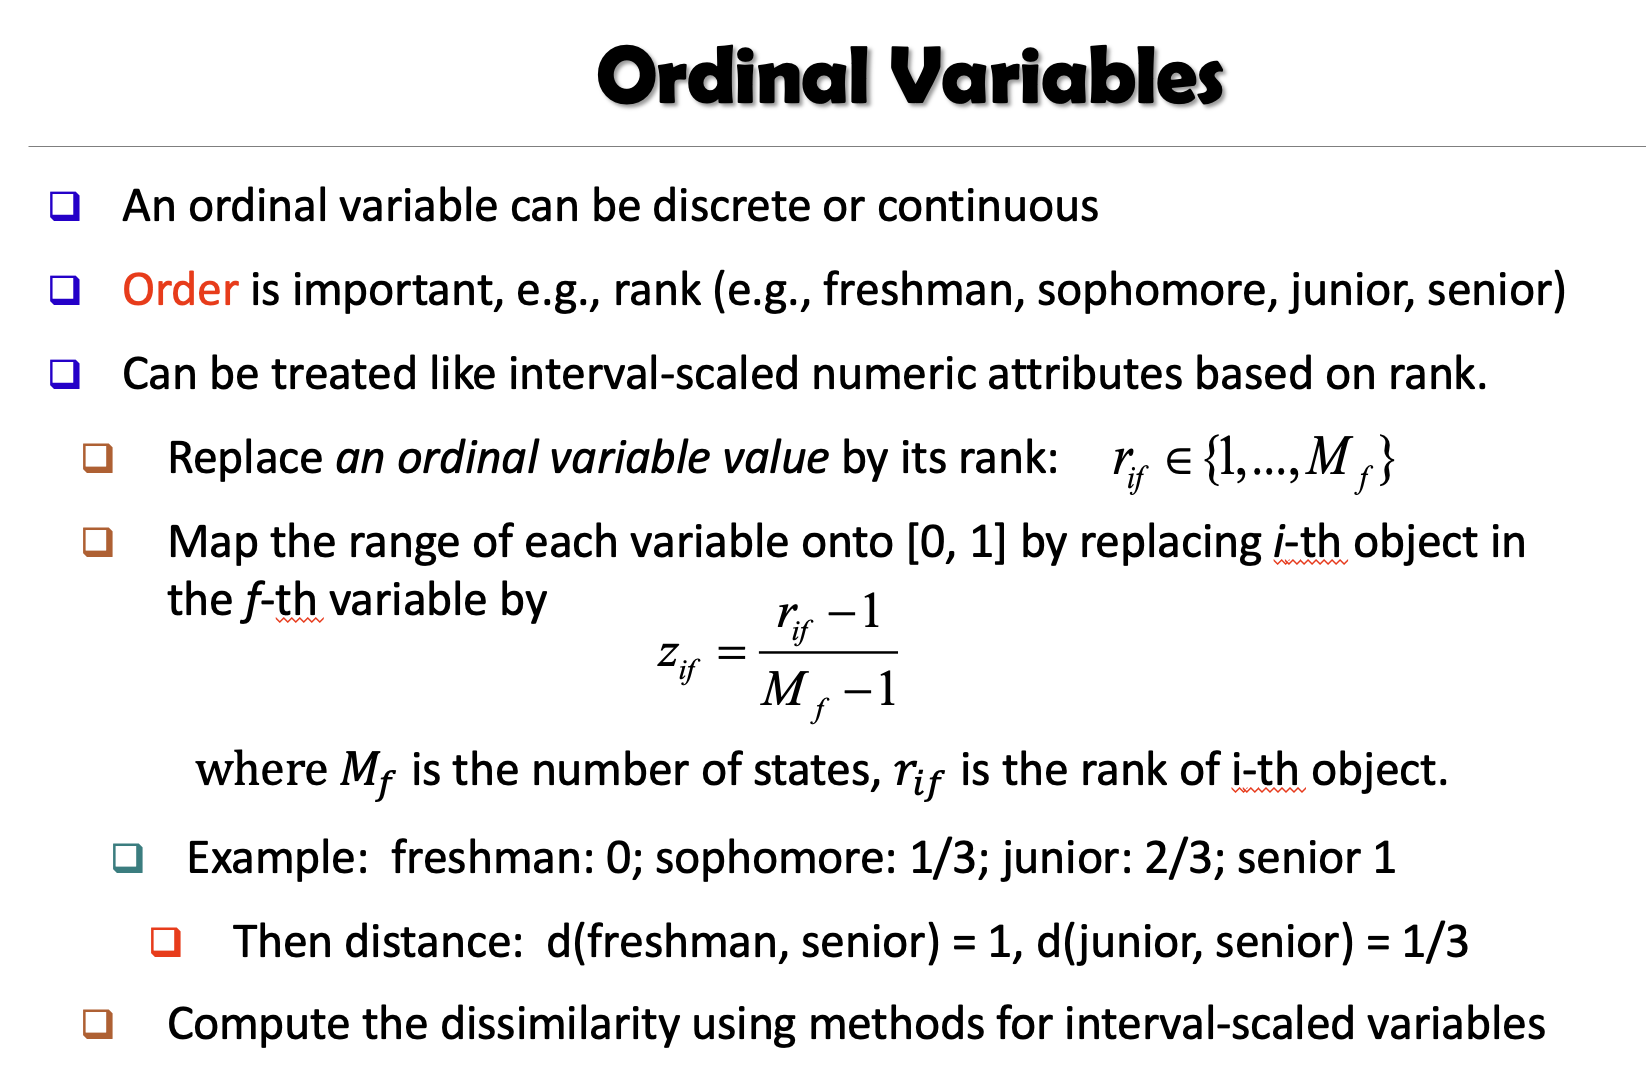

## Ordinal Variables

**Condition** is an ordinal variable.

Fair: 1
Good: 2
Very Good: 3
Excellent: 4

In [11]:
real_estate_data

,Bedroom Count,Square Footage,House Colour,Has Garage,Has Shed,Condition
0,0.48795,1.288576,Yellow,True,True,Good
1,0.48795,-0.615567,Yellow,False,False,Good
2,-2.43975,0.878453,Red,False,True,Excellent
3,-0.48795,-1.028237,Blue,False,False,Fair
4,1.46385,-0.284411,Red,True,False,Fair
5,0.48795,-1.025689,Yellow,False,True,Very Good
6,0.48795,-1.260045,Red,False,False,Excellent
7,-0.48795,1.470711,Yellow,False,True,Fair
8,0.48795,-0.447442,Blue,True,True,Very Good
9,-0.48795,1.023652,Blue,True,True,Very Good


In [12]:
# Based on the information given in the slide, we first need to map the ordinal variable 'Condition' onto a [0, 1] scale.
# We then compute the distance matrix based on these normalized values.

# Mapping of the 'Condition' variable to ranks
condition_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4}
# Number of states for the 'Condition' variable
M = len(condition_mapping)

# Replace 'Condition' variable values with their ranks
real_estate_data['Condition Rank'] = real_estate_data['Condition'].map(condition_mapping)

# Normalize the ranks onto a [0, 1] scale
real_estate_data['Condition Normalized'] = (real_estate_data['Condition Rank'] - 1) / (M - 1)

# Initialize the distance matrix
num_objects = len(real_estate_data)
distance_matrix_ordinal = np.zeros((num_objects, num_objects))

# Compute the distance matrix for the 'Condition Normalized' attribute
for i in range(num_objects):
    for j in range(num_objects):
        distance_matrix_ordinal[i, j] = abs(real_estate_data['Condition Normalized'][i] - real_estate_data['Condition Normalized'][j])

# Convert the distance matrix into a DataFrame for display
distance_matrix_ordinal_df = pd.DataFrame(distance_matrix_ordinal)
distance_matrix_ordinal_df.head()


,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333
1,0.000000,0.000000,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333
2,0.666667,0.666667,0.000000,1.000000,1.000000,0.333333,0.000000,1.000000,0.333333,0.333333
3,0.333333,0.333333,1.000000,0.000000,0.000000,0.666667,1.000000,0.000000,0.666667,0.666667
4,0.333333,0.333333,1.000000,0.000000,0.000000,0.666667,1.000000,0.000000,0.666667,0.666667


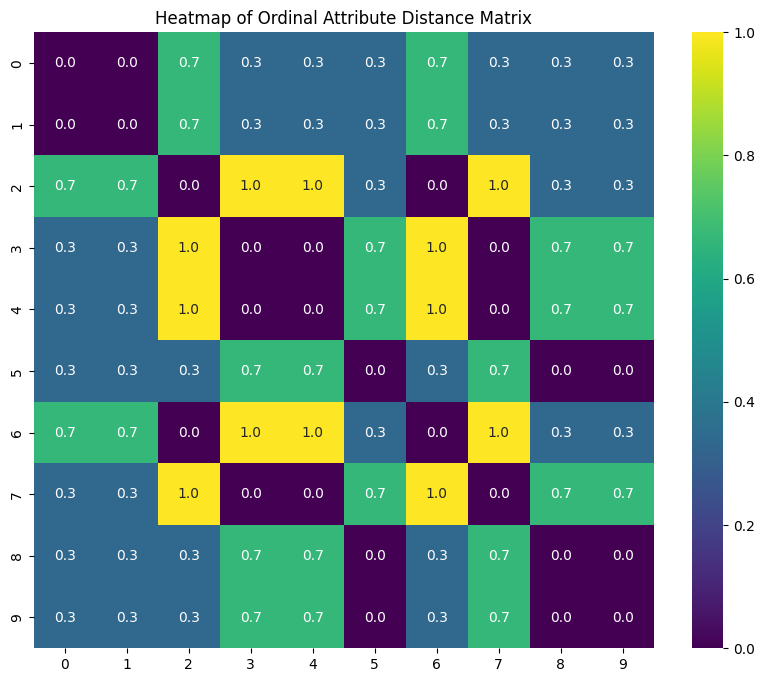

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the heatmap of the distance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix_ordinal_df, cmap='viridis', annot=True, fmt='.1f')
plt.title("Heatmap of Ordinal Attribute Distance Matrix")
plt.show()


In [14]:
real_estate_data

,Bedroom Count,Square Footage,House Colour,Has Garage,Has Shed,Condition,Condition Rank,Condition Normalized
0,0.48795,1.288576,Yellow,True,True,Good,2,0.333333
1,0.48795,-0.615567,Yellow,False,False,Good,2,0.333333
2,-2.43975,0.878453,Red,False,True,Excellent,4,1.000000
3,-0.48795,-1.028237,Blue,False,False,Fair,1,0.000000
4,1.46385,-0.284411,Red,True,False,Fair,1,0.000000
5,0.48795,-1.025689,Yellow,False,True,Very Good,3,0.666667
6,0.48795,-1.260045,Red,False,False,Excellent,4,1.000000
7,-0.48795,1.470711,Yellow,False,True,Fair,1,0.000000
8,0.48795,-0.447442,Blue,True,True,Very Good,3,0.666667
9,-0.48795,1.023652,Blue,True,True,Very Good,3,0.666667


In [15]:
# Based on the provided slide, we will create a combined distance matrix using all columns
# First, we need to calculate distances for each attribute type according to their nature (numeric, nominal, ordinal)

# # Normalizing numeric attributes 'Bedroom Count' and 'Square Footage'
# max_bedroom_count = real_estate_data['Bedroom Count'].max()
# min_bedroom_count = real_estate_data['Bedroom Count'].min()
# max_square_footage = real_estate_data['Square Footage'].max()
# min_square_footage = real_estate_data['Square Footage'].min()

# real_estate_data['Bedroom Count Normalized'] = real_estate_data['Bedroom Count'].apply(
#     lambda x: (x - min_bedroom_count) / (max_bedroom_count - min_bedroom_count))
# real_estate_data['Square Footage Normalized'] = real_estate_data['Square Footage'].apply(
#     lambda x: (x - min_square_footage) / (max_square_footage - min_square_footage))

# Function to calculate distances for nominal attributes
def nominal_distance(x, y):
    return 0 if x == y else 1

# Function to calculate the combined distance
def combined_distance(row_i, row_j):
    # Numeric distances
    distance_bedroom = abs(row_i['Bedroom Count'] - row_j['Bedroom Count'])
    distance_square_footage = abs(row_i['Square Footage'] - row_j['Square Footage'])
    
    # Nominal distance (House Colour)
    distance_colour = nominal_distance(row_i['House Colour'], row_j['House Colour'])
    
    # Binary distances (Has Garage, Has Shed)
    distance_garage = nominal_distance(row_i['Has Garage'], row_j['Has Garage'])
    distance_shed = nominal_distance(row_i['Has Shed'], row_j['Has Shed'])
    
    # Ordinal distance (Condition Normalized)
    distance_condition = abs(row_i['Condition Normalized'] - row_j['Condition Normalized'])
    
    # Sum of distances
    sum_distances = distance_bedroom + distance_square_footage + distance_colour + distance_garage + distance_shed + distance_condition
    
    # Number of non-zero distances (indicates the number of non-missing and non-identical attributes)
    num_non_zero_distances = sum([
        1 if distance_bedroom > 0 else 0,
        1 if distance_square_footage > 0 else 0,
        1 if distance_colour > 0 else 0,
        1 if distance_garage > 0 else 0,
        1 if distance_shed > 0 else 0,
        1 if distance_condition > 0 else 0
    ])
    
    # Combined dissimilarity measure
    combined_dissimilarity = sum_distances / num_non_zero_distances if num_non_zero_distances else 0
    return combined_dissimilarity

# Initialize the combined distance matrix
num_objects = len(real_estate_data)
distance_matrix_combined = np.zeros((num_objects, num_objects))

# Calculate the combined distance matrix
for i in range(num_objects):
    for j in range(num_objects):
        distance_matrix_combined[i, j] = combined_distance(real_estate_data.iloc[i], real_estate_data.iloc[j])

# Convert the combined distance matrix into a DataFrame for display
distance_matrix_combined_df = pd.DataFrame(distance_matrix_combined)
distance_matrix_combined_df.head()


,0,1,2,3,4,5,6,7,8,9
0,0.000000,1.301381,1.200898,1.104341,0.976444,1.215866,1.243058,0.622842,1.023117,0.643539
1,1.301381,0.000000,1.417677,0.680476,0.728078,0.581152,0.770382,1.098878,0.700292,0.991409
2,1.200898,1.417677,0.000000,1.371698,1.613293,1.541294,2.022066,1.136015,1.317386,0.886066
3,1.104341,0.680476,1.371698,0.000000,1.173906,0.729023,0.801927,1.499649,0.844672,1.179639
4,0.976444,0.728078,1.613293,1.173906,0.000000,0.897307,0.987884,1.341385,0.761119,1.185306


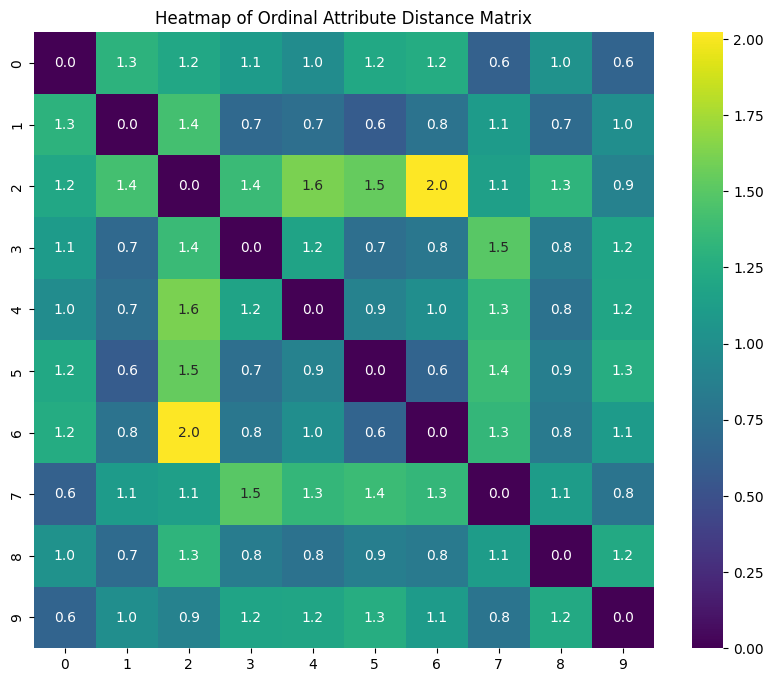

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the heatmap of the distance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix_combined_df, cmap='viridis', annot=True, fmt='.1f')
plt.title("Heatmap of Ordinal Attribute Distance Matrix")
plt.show()


In [17]:
real_estate_original_data

,Bedroom Count,Square Footage,House Colour,Has Garage,Has Shed,Condition
0,4,3189,Yellow,True,True,Good
1,4,1694,Yellow,False,False,Good
2,1,2867,Red,False,True,Excellent
3,3,1370,Blue,False,False,Fair
4,5,1954,Red,True,False,Fair
5,4,1372,Yellow,False,True,Very Good
6,4,1188,Red,False,False,Excellent
7,3,3332,Yellow,False,True,Fair
8,4,1826,Blue,True,True,Very Good
9,3,2981,Blue,True,True,Very Good


In [18]:
real_estate_original_data.iloc[[2,6]]

,Bedroom Count,Square Footage,House Colour,Has Garage,Has Shed,Condition
2,1,2867,Red,False,True,Excellent
6,4,1188,Red,False,False,Excellent


In [19]:
real_estate_original_data.iloc[[1,5]]

,Bedroom Count,Square Footage,House Colour,Has Garage,Has Shed,Condition
1,4,1694,Yellow,False,False,Good
5,4,1372,Yellow,False,True,Very Good
